In [10]:
import numpy as np
import random #not good practice
import matplotlib.pyplot as plt
import math 
import statistics
from scipy import stats
import seaborn as sns

# 2D Gaussian Metropolis Hasting

In [289]:
def Gaussian_Metropolis_Hasting(number_of_trials,mu,sigma):
    
    accepted=[0,0]
    states = [] # the states of the MH
    current=[0,0]
    #cov = [[sigma[0], 0], [0, sigma[1]]]

    #current[0], current[1] = np.random.multivariate_normal(mu, cov, 1).T
    current[0] = random.uniform(-sigma[0][0]+mu[0],sigma[0][0]+mu[0])#choose a random number (central) to begin
    current[1] = random.uniform(-sigma[1][1]+mu[1],sigma[1][1]+mu[1])#choose a random number (central) to begin
   
    kernel_width = [1,1] #random values to start with
    keep_up_to_date_kernel_counter = 0  
    
    for i in range(1,number_of_trials+1):#repeat per number of trials
        states.append(current) # add the current value to list of MH values
        
        predicted=[0,0]
        predicted[0] = random.uniform(current[0]-kernel_width[0],current[0]+kernel_width[0]) # predict a value, based off how close the running acceptance rate is to ideal 25-27%
        predicted[1] = random.uniform(current[1]-kernel_width[1],current[1]+kernel_width[1]) # predict a value, based off how close the running acceptance rate is to ideal 25-27%

        #kernel = [[kernel_width[0], 0], [0, kernel_width[1]]]
        #predicted[0], predicted[1] = np.random.multivariate_normal(mu, kernel, 1).T
        

    
        
        current_take_mu = np.subtract(current,mu)
        current_gaussian = coefficient * np.exp( -0.5* current_take_mu.transpose() * np.linalg.inv(sigma) * current_take_mu  )

        predicted_take_mu = np.subtract(predicted,mu)
        predicted_gaussian = np.exp( -0.5* predicted_take_mu.transpose() * np.linalg.inv(sigma) * predicted_take_mu  )

        current_proability = np.linalg.norm(current_gaussian) #sqrt (a**2+b**2.....)
        predicted_proability = np.linalg.norm(predicted_gaussian)  #sqrt (a**2+b**2.....)
        
        
        
        acceptance = min(predicted_proability/current_proability,1) # if the proability of predicted is grater than current given the known distribution
        
        if random.uniform(0,1)<acceptance: #if the probability of the predicted value is greater than a random float accept it. if not... do nothing
            current = predicted #set the current value to the predicted one
            accepted[0]=accepted[0]+1
            accepted[1]=accepted[1]+1
            
        if accepted[0]/i > 0.27: #if the acceptance rate is too high > 27% 
            kernel_width[0] = kernel_width[0] - ((accepted[0]/i)-0.25)# make sure it requires a closer number to current next iteration
        if accepted[1]/i > 0.27: #if the acceptance rate is too high > 27% 
            kernel_width[1] = kernel_width[1] - ((accepted[1]/i)-0.25)# make sure it requires a closer number to current next iteration

        if accepted[0]/i < 0.25: #if the acceptance rate is too high > 27% make sure its decreased next iteration
            kernel_width[0] = kernel_width[0] + (0.27-(accepted[0]/(i))) # make sure it requires a further number to current next iteration
        if accepted[1]/i < 0.25: #if the acceptance rate is too high > 27% make sure its decreased next iteration
            kernel_width[1] = kernel_width[1] + (0.27-(accepted[1]/(i))) # make sure it requires a further number to current next iteration
        
        
        keep_up_to_date_kernel_counter= keep_up_to_date_kernel_counter+1
        if keep_up_to_date_kernel_counter==15: # we want to restart counting the accepted rate after the warm up period
            accepted[0]=int(0.26*i) #remove any inconsitency from the warm up period
            accepted[1]=int(0.26*i) #remove any inconsitency from the warm up period
            keep_up_to_date_kernel_counter=0
    return states ,accepted;# [burn_in:] # uncomment if having a warm up 20%




### Setting Parameters ###
mu=[10,12]
sigma = [[1,0],
        [0,2]]#larger sigmas can have a impact on the acceptance rate. 

number_of_trials=1000
number_of_stacks=20 # number of recatngles on graph

MH_predictions,accepted =  Gaussian_Metropolis_Hasting(number_of_trials,mu=mu,sigma=sigma) # run the MH prediction: number of iterations, mean and variation. 


In [290]:
MH_predictions

[[10.361623123909128, 13.474920702026843],
 [9.509189246003611, 13.544207123169613],
 [9.509189246003611, 13.544207123169613],
 [9.509189246003611, 13.544207123169613],
 [9.47794987299688, 13.586311038588736],
 [9.317519671190878, 13.712780913529313],
 [9.317519671190878, 13.712780913529313],
 [9.317519671190878, 13.712780913529313],
 [9.317519671190878, 13.712780913529313],
 [9.317519671190878, 13.712780913529313],
 [9.317519671190878, 13.712780913529313],
 [9.317519671190878, 13.712780913529313],
 [9.317519671190878, 13.712780913529313],
 [9.317519671190878, 13.712780913529313],
 [10.102809531127534, 12.997717157762992],
 [10.102809531127534, 12.997717157762992],
 [10.102809531127534, 12.997717157762992],
 [10.102809531127534, 12.997717157762992],
 [10.102809531127534, 12.997717157762992],
 [9.570584699138307, 12.18442441374195],
 [9.570584699138307, 12.18442441374195],
 [9.570584699138307, 12.18442441374195],
 [9.570584699138307, 12.18442441374195],
 [9.570584699138307, 12.184424413

In [291]:
#the acceptance rate is based on the values after the warm up period
#to make the acceptance values include that of the warm up period comment out the lines as indicated above
print('Acceptance Rate:', round(accepted[0]*100/number_of_trials,2),'%') #print the acceptance rate - for accuracry purpose only
    

Acceptance Rate: 26.0 %


In [292]:
x=[]
y=[]
for i in range (0,len(MH_predictions)):
    x.append(MH_predictions[i][0])
    y.append(MH_predictions[i][1])

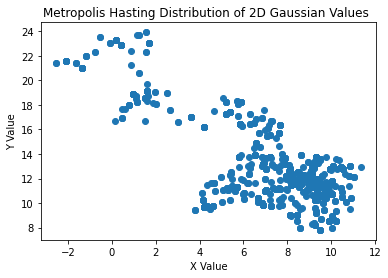

In [293]:

plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Metropolis Hasting Distribution of 2D Gaussian Values ')

plt.scatter(x, y)
plt.show()

In [237]:
predicted = [5,3]
current = [9,3]
mean = [4,3]

sigma = [[1,0],
         [0,2]]

coefficient = 3 # 1/ ( (2*np.pi)**(n/2) * ((np.linalg.norm(sigma))**0.5) )

In [238]:
current_take_mu = np.subtract(current,mean)
current_gaussian = coefficient * np.exp( -0.5* current_take_mu.transpose() * np.linalg.inv(sigma) * current_take_mu  )

predicted_take_mu = np.subtract(predicted,mean)
predicted_gaussian = coefficient * np.exp( -0.5* predicted_take_mu.transpose() * np.linalg.inv(sigma) * predicted_take_mu  )


In [239]:
np.exp( -0.5* predicted_take_mu.transpose() * np.linalg.inv(sigma) * predicted_take_mu  )


array([[0.60653066, 1.        ],
       [1.        , 1.        ]])

In [240]:
current_proability = np.linalg.norm(current_gaussian) #sqrt (a**2+b**2.....)

In [241]:
predicted_proability = np.linalg.norm(predicted_gaussian)  #sqrt (a**2+b**2.....)

In [242]:
acceptance = min(current_proability/predicted_proability,1) # if the proability of predicted is grater than current given the known distribution   


In [243]:
print(acceptance)

0.9438051851050022


In [244]:
predicted_proability/current_proability

1.05954069312381

## Jarque-Bera Test

In [ ]:
skewness = 

In [ ]:
kurtosis = 

In [ ]:
BS = n[((skewness**2)/6)+(((kurtosis-3)**2)/24)]